In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from matplotlib.backends.backend_pdf import PdfPages
import h5py
from scipy.stats import entropy
import scipy.cluster.hierarchy as _sch
from activ import load_data
from sklearn.decomposition import PCA

In [2]:
data = load_data()
nmfdata = load_data(uoinmf=True)

In [3]:
data_oc = data.outcomes
data_bm = data.biomarkers
nmf_oc = nmfdata.outcome_bases
oc_features = data.outcome_features

In [4]:
pca = PCA(n_components=6)
pca.fit(data_oc)
pca_oc = pca.components_
pca_abs = np.abs(pca_oc)

In [5]:
def rank_features(data):
    values = sorted(data.sum(axis=0))[::-1]
    return values

In [6]:
pca_values = rank_features(pca_abs)
nmf_values = rank_features(nmf_oc)
len(pca_values), len(nmf_values)

(177, 177)

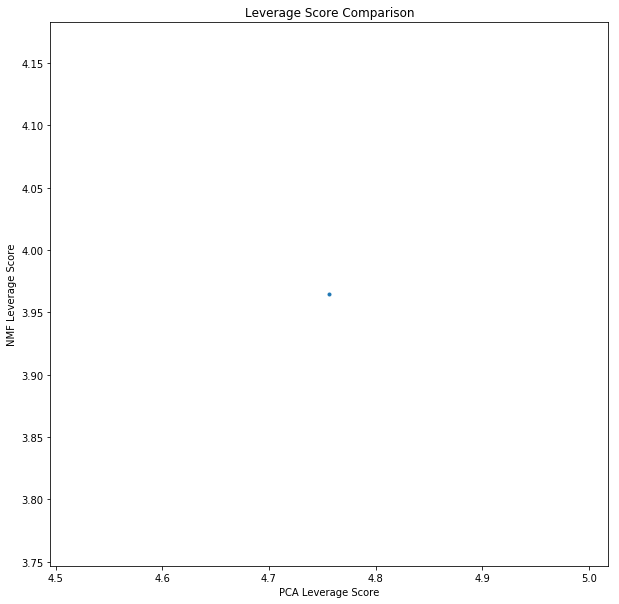

In [11]:
plt.figure(figsize=(10,10))
plt.plot(np.linalg.norm(pca_values), np.linalg.norm(nmf_values),'.')
plt.xlabel('PCA Leverage Score')
plt.ylabel('NMF Leverage Score')
# plt.xticks(np.arange(-6, 2, step=1))
# plt.yticks(np.arange(-6, 2, step=1))
plt.title('Leverage Score Comparison')
plt.savefig('/Users/ahyeon/Desktop/activ misc/ls_comparison.pdf')